## 국내주식 잔고이력(STK_BNC_HIST)

기간 : 2016년 1월 ~ 2020년 12월
- act_id : 계좌번호 (EX. 27666E123D)
- bse_dt : 기준일자 (EX. 20200522) -> 조회
- iem_cd : 종목코드 (EX. A000100)
- bnc_qty : 잔고수량 (EX. 500), 종목 보유 잔고수량을 말한다.  -> 몇 주 가지고 있냐? 
- tot_aet_amt: 잔고금액 (EX. 945000), 종목 평가금액을 말한다. -> 주가g(날마다 바뀜) * 수량
- stk_par_pr : 액면가 (EX. 1000), 주당 액면가를 말한다. ->  기업이 주식을 최초로 발행할때 정한 주식 1주당 가격

In [3]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import core.config as conf

In [4]:
# hist = pd.read_csv(conf.data_path + 'stk_bnc_hist.csv')
hist = pd.read_csv('~/Study/' + conf.data_path[2:] + 'stk_bnc_hist.csv')
iem = pd.read_csv('~/Study/' + conf.data_path[2:] + 'iem_info_20210902.csv')

In [5]:
hist.head()

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0


In [6]:
iem.head()

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99
3,A000227,유유제약2우B,8,99,99
4,A000325,노루홀딩스우,2,99,99


## 계좌 번호 별 보유 주식 종목

- act_id : 계좌 번호 (9992개)
- iem_cd : 종목 코드

In [7]:
act_id = hist['act_id'].unique()
id_f = pd.DataFrame(act_id, columns=['act_id'])
id_f

,act_id
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...
1,66d8611661423c1e0764994be4a7afe772e70a8f7f3cd2...
2,51c0d868a0d91c15a5eefdd68fbca1d1c5e3215fcebb33...
3,dbc7f1c8694e7a40827680f9d8b8538db774a134fa24bb...
4,7a17368be2d52cf0c0bd1873748d09ebf416c437835ea1...
...,...
9987,39e431e1f1c4398e822c78420fa37cde61b521d0ae0ea9...
9988,9aca83b59ffcc920ef4d6f577e45041cf98ecc70160309...
9989,ba4c5e445f98014ba264571300430c4f4b75a81dab0256...
9990,3e51702eea7420c4c0c68831b42bc7dea1b79064df6692...


#### 계좌 번호 별 보유 주식 코드 리스트 & 개수
-> 자윤스 act_id 랑 연결해서 '가족 형성기 ㅇ~~'별로 가지고 있는 주식 종목 리스트

In [131]:
df = hist[['act_id', 'iem_cd']]
id_cd_count = df.groupby('act_id')['iem_cd'].count().reset_index(name='count')
id_cd_list = df.groupby('act_id')['iem_cd'].apply(list).reset_index(name='iem_cd_list')
pd.concat([id_cd_list, id_cd_count['count']], axis=1)

,act_id,iem_cd_list,count
0,0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c546...,"[A065450, A060980, A060980, A060980, A060980, ...",126
1,0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa...,"[A005935, A005935, A005935, A005935, A005935, ...",110
2,0008d1bfac569bdb998897e2eb8519dec06b9277a686f4...,"[A083450, A085660, A085660, A348210, A307950, ...",293
3,000a83a961cbcbce40673aed998effbd462fb10dcac8e6...,"[A192820, A079160, A068290, A068270, A066570, ...",24
4,000b92ca83a96312a0909b1f489340f4d399c86555012f...,"[A005930, A005930, A005930, A000660, A367380, ...",49
...,...,...,...
9987,ffea89aa464a4fcf8a5416989d21deef4e748192ba17bf...,"[A037400, A037400, A037400, A037400, A037400, ...",77
9988,ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7ba...,"[A003060, A003060, A003060, A003000, A003000, ...",144
9989,ffee399294db1c721e010cbf3dae5c8a1f140dbaf2dcae...,"[A122870, A122870, A104040, A104040, A082800, ...",64
9990,fff7d563e388744fdc1ca90153ec0161d1345511cb9070...,"[A033640, A034020, A034020, A038070, A038070, ...",70


## 종목 코드 분포도 분석

- act_id : 계좌 번호
- iem_cd : 종목 코드
- iem_krl_nm : 종목 코드 이름

#### 종목 코드

In [9]:
hist['iem_cd'].value_counts()

A005930    61617
A000660    22483
A035720    21616
A005380    17722
A005935    17651
           ...  
A191390        1
A330990        1
A331520        1
A32316K        1
A350990        1
Name: iem_cd, Length: 2926, dtype: int64

In [10]:
hist_f = hist['iem_cd'].value_counts().rename_axis('iem_cd').reset_index(name = 'count')
hist_f

,iem_cd,count
0,A005930,61617
1,A000660,22483
2,A035720,21616
3,A005380,17722
4,A005935,17651
...,...,...
2921,A191390,1
2922,A330990,1
2923,A331520,1
2924,A32316K,1


#### 종목 코드 이름

In [11]:
iem_f = iem[['iem_cd','iem_krl_nm']]
iem_f

,iem_cd,iem_krl_nm
0,A000020,동화약품
1,A000080,하이트진로
2,A000180,성창기업지주
3,A000227,유유제약2우B
4,A000325,노루홀딩스우
...,...,...
3074,A383310,에코프로에이치엔
3075,A385520,KODEX K-미래차액티브
3076,A388280,KBSTAR Fn컨택트대표
3077,A388420,KBSTAR 비메모리반도체액티브


#### 종목 종류 별 개수

In [12]:
iem_cdname = pd.merge(hist_f, iem_f, on = 'iem_cd')
iem_cdname

,iem_cd,count,iem_krl_nm
0,A005930,61617,삼성전자
1,A000660,22483,SK하이닉스
2,A035720,21616,카카오
3,A005380,17722,현대차
4,A005935,17651,삼성전자우
...,...,...,...
2921,A191390,1,바디프랜드
2922,A330990,1,케이비제19호스팩
2923,A331520,1,교보9호스팩
2924,A32316K,1,테바1우


#### 상위 10개 주식 종목 분포도

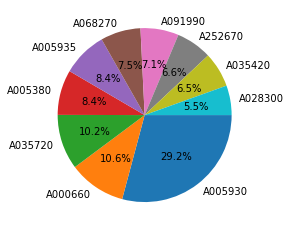

In [13]:
plt.pie(iem_cdname['count'][:10], labels = iem_cdname['iem_cd'][:10], 
        autopct = '%0.1f%%', counterclock = False)
plt.show()

## 종목 별 주당 액면가 
- iem_cd : 종목 코드
- stk_par_pr : 액면가

In [25]:
df1 = hist[['iem_cd', 'stk_par_pr']].drop_duplicates(['iem_cd'])
df2 = pd.merge(iem_cdname, df1, on = 'iem_cd')
df2

,iem_cd,count,iem_krl_nm,stk_par_pr
0,A005930,61617,삼성전자,100.0
1,A000660,22483,SK하이닉스,5000.0
2,A035720,21616,카카오,500.0
3,A005380,17722,현대차,5000.0
4,A005935,17651,삼성전자우,5000.0
...,...,...,...,...
2921,A191390,1,바디프랜드,100.0
2922,A330990,1,케이비제19호스팩,100.0
2923,A331520,1,교보9호스팩,100.0
2924,A32316K,1,테바1우,1000.0


#### 주당 액면가 분포도

- 데이터에 포함된 종목 2926개 중 주당 액면가 분포 조사

In [116]:
stk_par_pr = df2['stk_par_pr'].value_counts().rename_axis('par').reset_index(name='count')

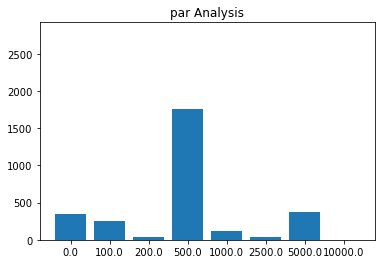

In [117]:
df_by_group = stk_par_pr.groupby(['par'])['count'].sum()
label = df_by_group.index
index = np.arange(len(label))
plt.title('par Analysis')
plt.bar(index, df_by_group)
plt.xticks(index, label, fontsize=10) # label 이름 넣기
plt.ylim(0, 2926)
plt.show()